## Gas Prices: Data Analysis

Visualizations and more of Data from many Sources

**Seaborn**

## Import 

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### import preprocessed data

3 datasets:
- fulldataset
- diesel only
- gasoline only

In [ ]:
# gasoline data loading
data = pd.read_csv('datasets/full_data.csv', skiprows=1, encoding='latin1')
data

In [ ]:
# gasoline data loading
gasoline_data = pd.read_csv('datasets/gasoline_data.csv', skiprows=1, encoding='latin1')
gasoline_data

In [ ]:
# diesel data loading
diesel_data = pd.read_csv('datasets/diesel_data.csv', skiprows=1, encoding='latin1')
diesel_data

## Basic Plots

Line, Scatter, Box

In [7]:
# copy df with resetted index (not used right now)
raw_gas_price_data = gas_price_data.reset_index() 

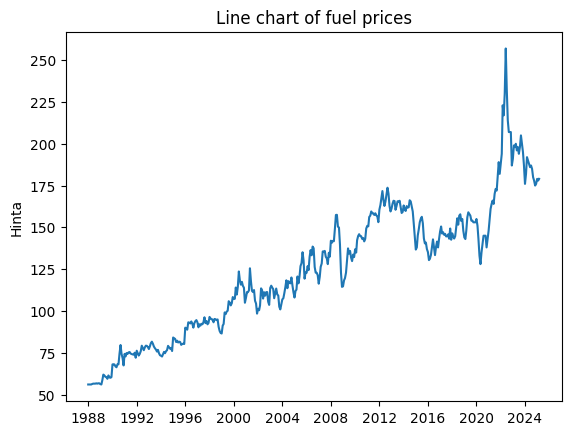

In [8]:
sns.lineplot(x=gas_price_data.index.values, y="Hinta", data=gas_price_data)
plt.title('Line chart of fuel prices')
plt.show()

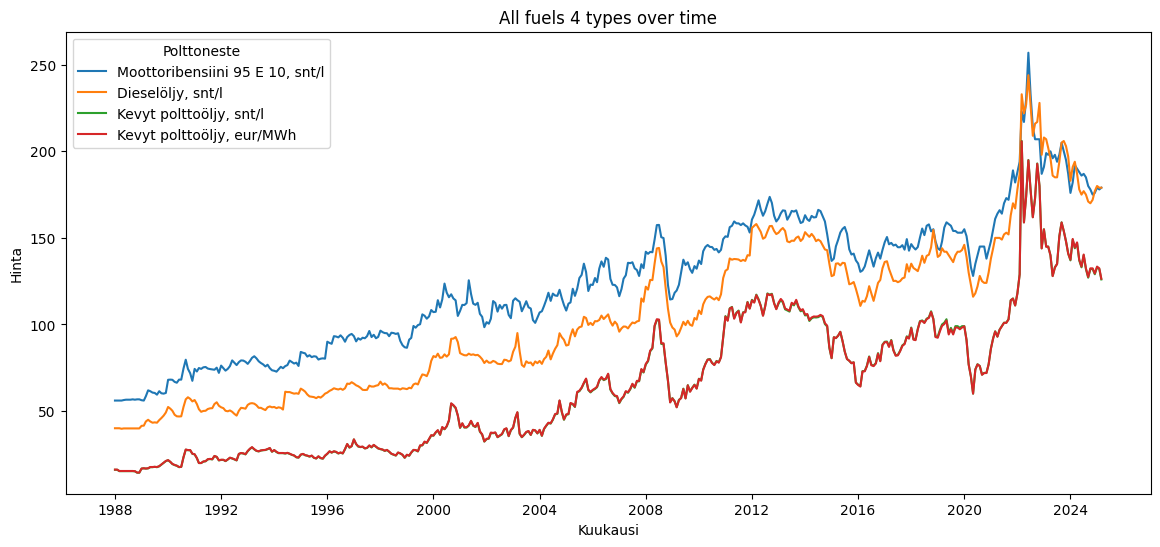

In [9]:
# multi line plot with hue
plt.figure(figsize=(14,6))
sns.lineplot(x=raw_data.index, y='Hinta', hue='Polttoneste', data=raw_data)
plt.title("All fuels 4 types over time")
plt.show()

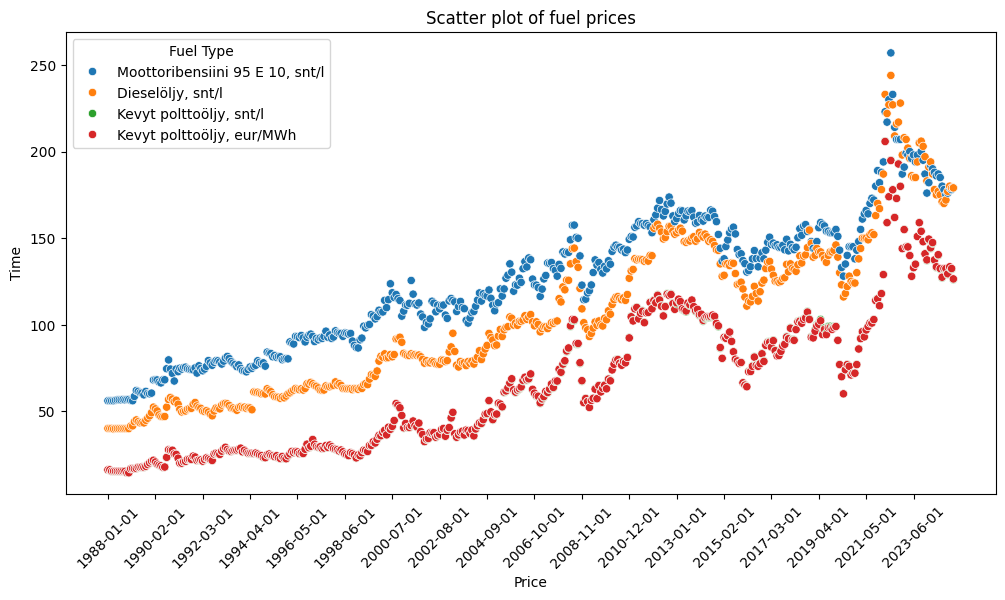

In [10]:
# Scatter plot
plt.figure(figsize=(12, 6))  # width=12 inches, height=6 inches
# plot
sns.scatterplot(
    x=raw_data.index.values, 
    y='Hinta', 
    hue='Polttoneste',  # different colors for each fuel
    data=raw_data
)
# Show only every 10th tick on y-axis
ticks = raw_data.index[::100]
plt.xticks(ticks, rotation=45)  # rotate 45 degrees
# labels and show plot
plt.xlabel("Price")
plt.ylabel("Time")
plt.title("Scatter plot of fuel prices")
plt.legend(title='Fuel Type')
plt.show()

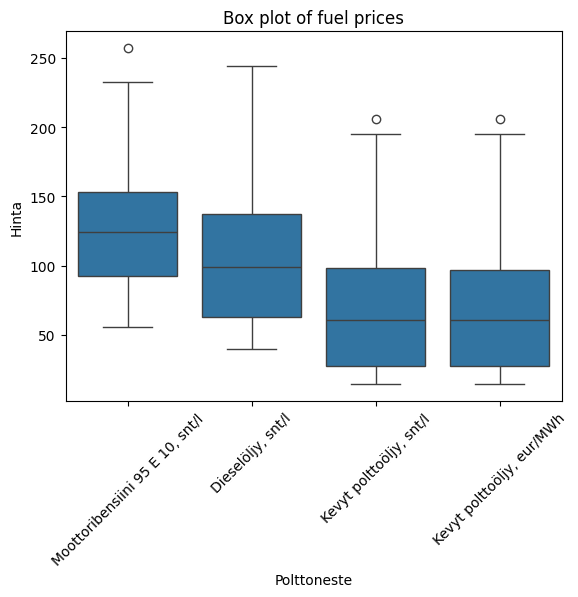

In [11]:
# Box plot of all 4 fuel prices over time
sns.boxplot(x='Polttoneste', y='Hinta', data=raw_data)
plt.xticks(rotation=45)  # Rotate x-axis labels 45 degrees
plt.title("Box plot of fuel prices")
plt.show()


### Advanced plot

In [12]:
# 12-month rolling averages for each fuel type
# first copy the dataframes to avoid SettingWithCopyWarning
gas_price_data = gas_price_data.copy()
diesel_price_data = diesel_price_data.copy()

# Gasoline 95 E10 snt/l
gas_price_data['Rolling_Hinta'] = gas_price_data.groupby('Polttoneste')['Hinta'].transform(lambda x: x.rolling(12, min_periods=1).mean())
# Diesel 10 snt/l
diesel_price_data['Rolling_Hinta'] = diesel_price_data.groupby('Polttoneste')['Hinta'].transform(lambda x: x.rolling(12, min_periods=1).mean())

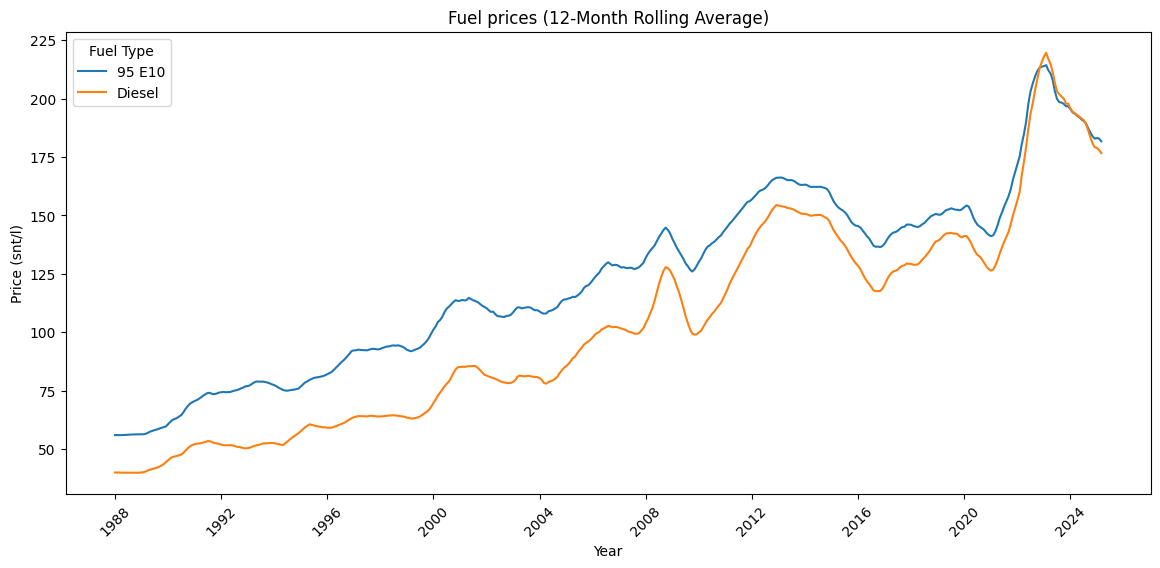

In [13]:
# Plot rolling averages
plt.figure(figsize=(14,6))
sns.lineplot(x=gas_price_data.index, y='Rolling_Hinta', data=gas_price_data, label='95 E10')
sns.lineplot(x=diesel_price_data.index, y='Rolling_Hinta', data=diesel_price_data, label='Diesel')
plt.title("Fuel prices (12-Month Rolling Average)")
plt.xlabel("Year")
plt.ylabel("Price (snt/l)")
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.show()

In [30]:
# last five + years (2018-2023)
five_years_data = raw_data[raw_data.index >= '01-01-2018']
# only diesel and gas
five_years_data = raw_data[~raw_data['Polttoneste'].isin(['Kevyt polttoöljy, snt/l', 'Kevyt polttoöljy, eur/MWh'])]
five_years_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-01-01,"Dieselöljy, snt/l",40.0,.
1988-02-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-02-01,"Dieselöljy, snt/l",40.0,.
1988-03-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
...,...,...,...
2025-01-01,"Dieselöljy, snt/l",180.0,-1.6
2025-02-01,"Moottoribensiini 95 E 10, snt/l",178.0,-2.2
2025-02-01,"Dieselöljy, snt/l",179.0,-6.3


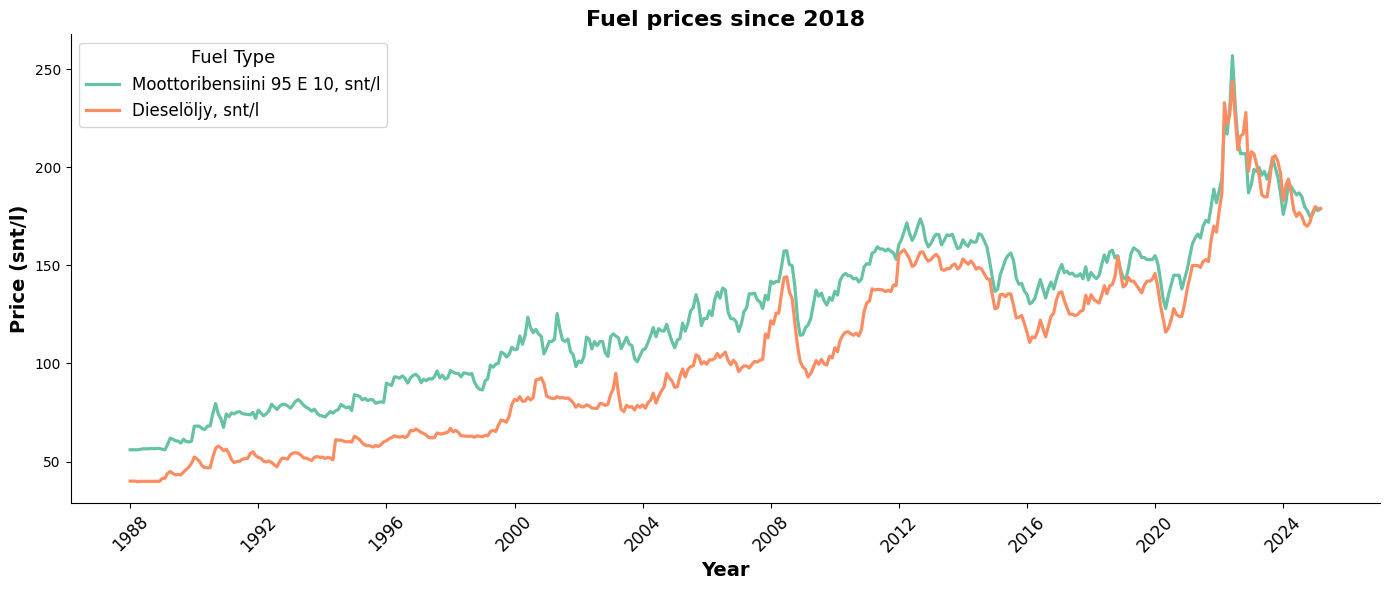

In [32]:
# multi line plot using hue
plt.figure(figsize=(14,6))
sns.lineplot(x=five_years_data.index, y='Hinta', hue='Polttoneste', data=five_years_data, linewidth=2.3)
# styling
sns.despine()
plt.title("Fuel prices since 2018", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14, weight='bold')
plt.ylabel("Price (snt/l)", fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Fuel Type", fontsize=12, title_fontsize=13)
plt.tight_layout()

plt.show()